In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("ford.csv")

X = df.drop(columns=['price'])  
y = df['price']

categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

In [8]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

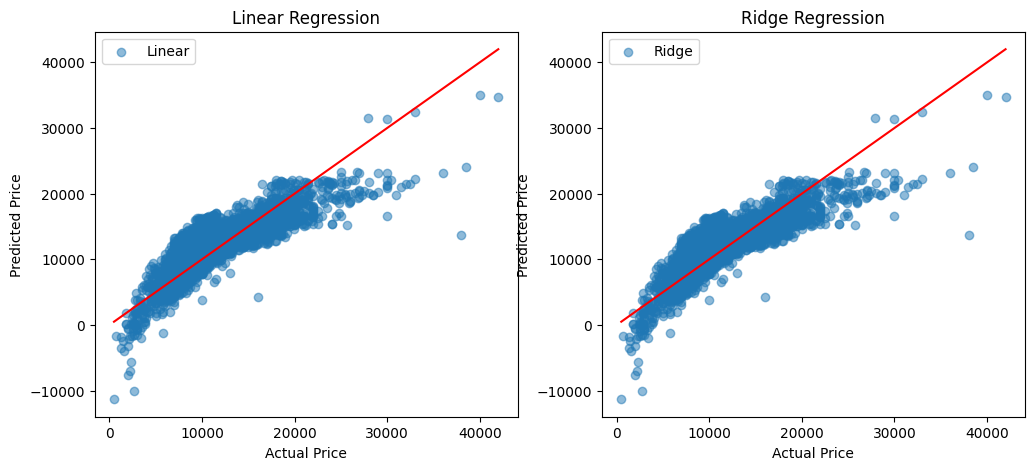

In [9]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear, alpha=0.5, label='Linear')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression")
plt.legend()

plt.show()

In [10]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Linear Coefficients": linear_model.coef_,
    "Ridge Coefficients": ridge_model.coef_
})
print(coefficients)


print(f"Linear Regression: MSE={mse_linear:.2f}, R²={r2_linear:.2f}")
print(f"Ridge Regression: MSE={mse_ridge:.2f}, R²={r2_ridge:.2f}")

        Feature  Linear Coefficients  Ridge Coefficients
0         model           106.453536          106.550727
1          year          2382.439441         2382.166063
2  transmission           -99.458002          -99.452898
3       mileage         -1228.730749        -1228.781651
4      fuelType          -600.649513         -600.706395
5           tax            66.059404           66.201716
6           mpg         -1060.555158        -1060.470188
7    engineSize          1833.195545         1832.952809
Linear Regression: MSE=5835063.27, R²=0.74
Ridge Regression: MSE=5835042.32, R²=0.74
